<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>

<h1><center><font size=8>Travel Package Purchase Prediction</center></font></h1>
<h1><center>Analitis, Iraklis - Project 4</center></h1>

# **Introduction**

## **Description**
### *Background and Context*

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

### *Objective*

To predict which customer is more likely to purchase the newly introduced travel package.

## **Data Dictionary**

### *Customer details:*

- **CustomerID:** Unique customer ID

- **ProdTaken:** Whether the customer has purchased a package or not (0: No, 1: Yes)

- **Age:** Age of customer

- **TypeofContact:** How customer was contacted (Company Invited or Self Inquiry)

- **CityTier:** City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.

- **Occupation:** Occupation of customer

- **Gender:** Gender of customer

- **NumberOfPersonVisiting:** Total number of persons planning to take the trip with the customer

- **PreferredPropertyStar:** Preferred hotel property rating by customer

- **MaritalStatus:** Marital status of customer

- **NumberOfTrips:** Average number of trips in a year by customer

- **Passport:** The customer has a passport or not (0: No, 1: Yes)

- **OwnCar:** Whether the customers own a car or not (0: No, 1: Yes)

- **NumberOfChildrenVisiting:** Total number of children with age less than 5 
planning to take the trip with the customer

- **Designation:** Designation of the customer in the current organization

- **MonthlyIncome:** Gross monthly income of the customer

### *Customer interaction data:*

- **PitchSatisfactionScore:** Sales pitch satisfaction score

- **ProductPitched:** Product pitched by the salesperson

- **NumberOfFollowups:** Total number of follow-ups has been done by the salesperson after the sales pitch

- **DurationOfPitch:** Duration of the pitch by a salesperson to the customer

#**Initial Assessment of Data**

## Import necessary libraries

In [4]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Data Preprocessing

In [5]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
tourism = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project4/Tourism.xlsx', sheet_name=1)

In [7]:
# copying data to another varaible to avoid any changes to original data
data = tourism.copy()

### View the first and last 5 rows of the dataset.

In [8]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [10]:
data.shape

(4888, 20)

* There are 4888 observations and 20 columns in the dataset

### Check the data types of the columns for the dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations-**
* There are 6 columns with Dtype object, they may be categorical.
* There are 8 columns with missing values.

In [12]:
#Drop Missing Values to avoid errors in type conversion and to treat for missing values
data.dropna(inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4128 non-null   int64  
 1   ProdTaken                 4128 non-null   int64  
 2   Age                       4128 non-null   float64
 3   TypeofContact             4128 non-null   object 
 4   CityTier                  4128 non-null   int64  
 5   DurationOfPitch           4128 non-null   float64
 6   Occupation                4128 non-null   object 
 7   Gender                    4128 non-null   object 
 8   NumberOfPersonVisiting    4128 non-null   int64  
 9   NumberOfFollowups         4128 non-null   float64
 10  ProductPitched            4128 non-null   object 
 11  PreferredPropertyStar     4128 non-null   float64
 12  MaritalStatus             4128 non-null   object 
 13  NumberOfTrips             4128 non-null   float64
 14  Passport

### Summary of the dataset.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
ProdTaken,4128.0,0.193072,0.394757,0.0,0.00,0.0,0.00,1.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.00,0.0,1.00,1.0


In [15]:
data.skew()

CustomerID                 -0.097971
ProdTaken                   1.555779
Age                         0.446236
CityTier                    0.714909
DurationOfPitch             1.384696
NumberOfPersonVisiting     -0.022566
NumberOfFollowups          -0.403821
PreferredPropertyStar       0.901050
NumberOfTrips               1.533037
Passport                    0.897782
PitchSatisfactionScore     -0.114547
OwnCar                     -0.460543
NumberOfChildrenVisiting    0.243254
MonthlyIncome               1.746316
dtype: float64

**Observations-**
* CustomerID seems to be symmetric
* Most columns seem to have some level of right-skewedness other than CustomerID, NumberOfPersonVisiting, NumberOfFollowups, PitchSatisfactionScore, and OwnCar

In [16]:
#Drop CustomerID since it is essentially synonymous with the row
data.drop(['CustomerID'],axis=1,inplace=True)

# **EDA**

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on ProdTaken

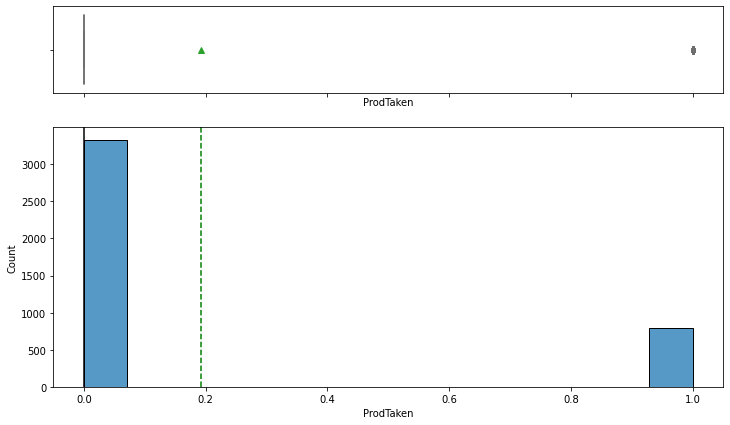

In [18]:
histogram_boxplot(data,'ProdTaken')

* The distribution is right-skewed and binary, most customers have not purchased a package.
* Outliers to the right.

### Observations on Age

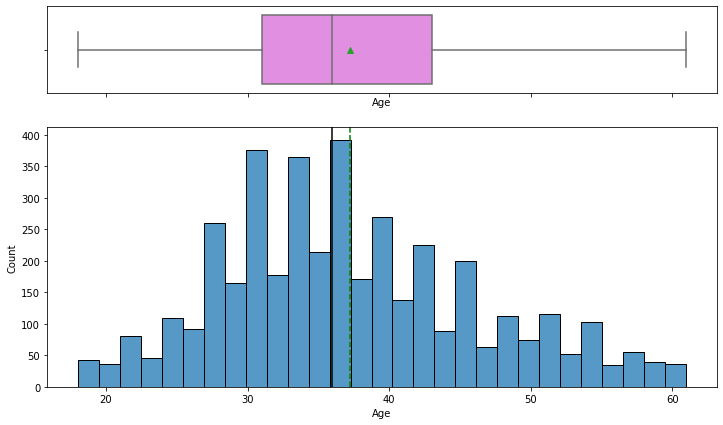

In [19]:
histogram_boxplot(data,'Age')

* The distribution is fairly symmetric, but right-skewed.

### Observations on CityTier

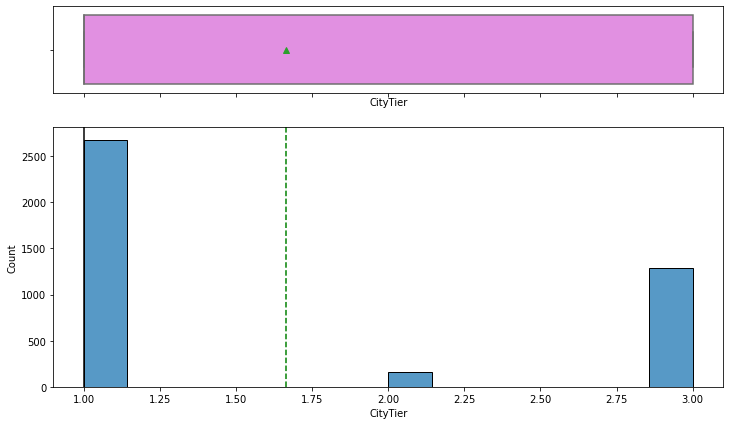

In [20]:
histogram_boxplot(data,'CityTier')

* The distribution is right-skewed, most cities are Tier 1. Very few cities are Tier 2.

### Observations on DurationOfPitch

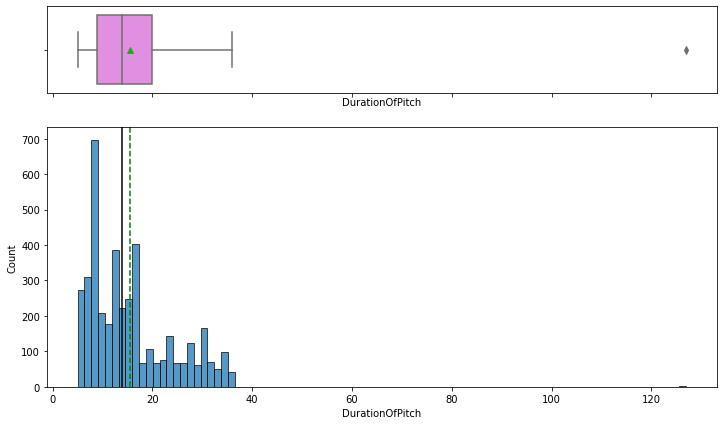

In [21]:
histogram_boxplot(data,'DurationOfPitch')

* The distribution is right-skewed.
* Outlier to the right. This may need to be treated.

### Observations on NumberOfPersonVisiting

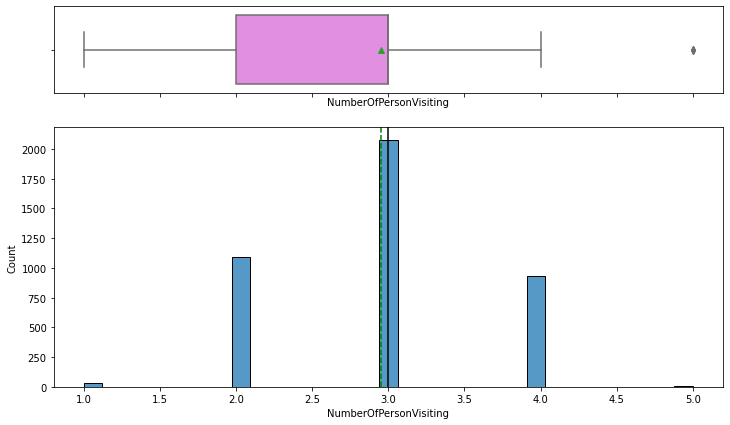

In [22]:
histogram_boxplot(data,'NumberOfPersonVisiting')

* The distribution is fairly symmetric and normal, but slightly left-skewed.
* Right outlier exists.

### Observations on NumberOfFollowups

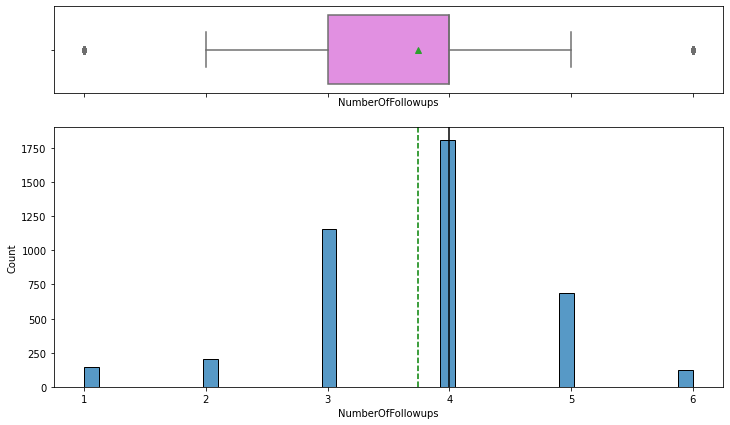

In [23]:
histogram_boxplot(data,'NumberOfFollowups')

* The distribution is fairly symmetric and normal, but left-skewed.
* Outliers on left and right.

### Observations on PreferredPropertyStar

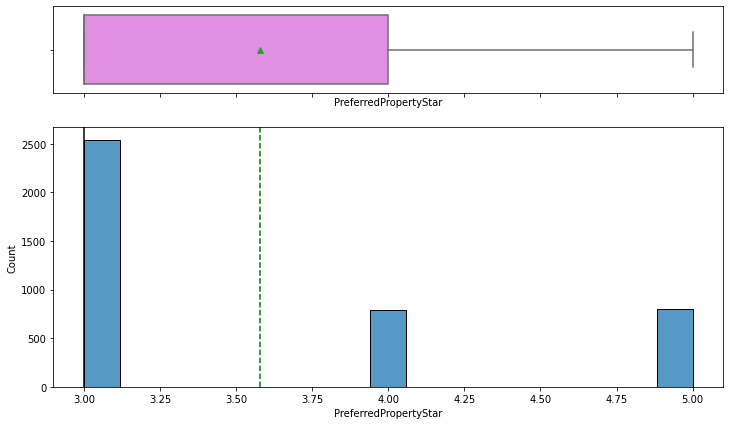

In [24]:
histogram_boxplot(data,'PreferredPropertyStar')

* The distribution is right-skewed. 

### Observations on NumberOfTrips

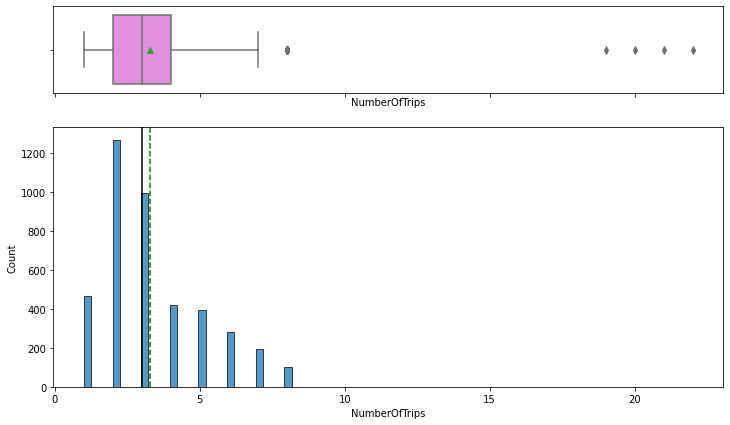

In [25]:
histogram_boxplot(data,'NumberOfTrips')

* The distribution is slightly right-skewed.
* Has a few outliers to the right.

### Observations on Passport

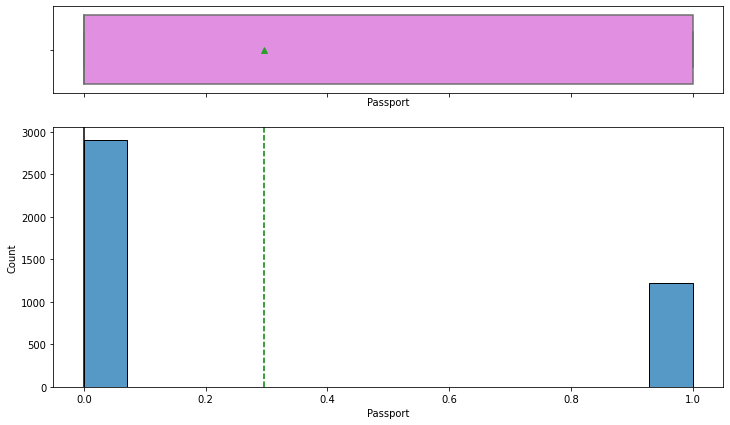

In [26]:
histogram_boxplot(data,'Passport')

* The distribution is right-skewed.

### Observations on PitchSatisfactionScore

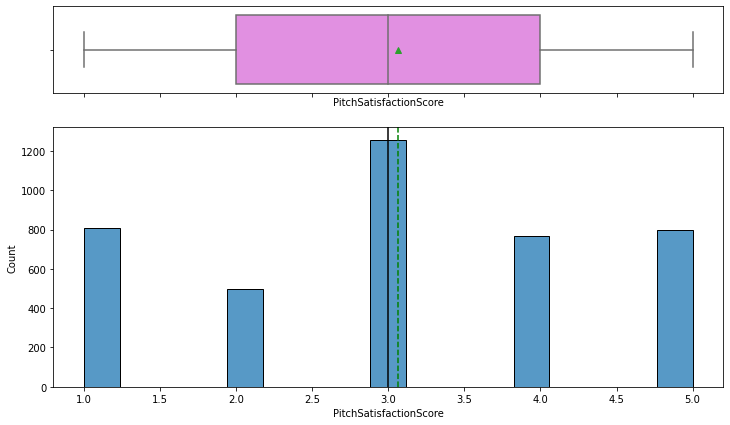

In [27]:
histogram_boxplot(data,'PitchSatisfactionScore')

* The distribution is fairly symmetric, but right-skewed.

### Observations on OwnCar

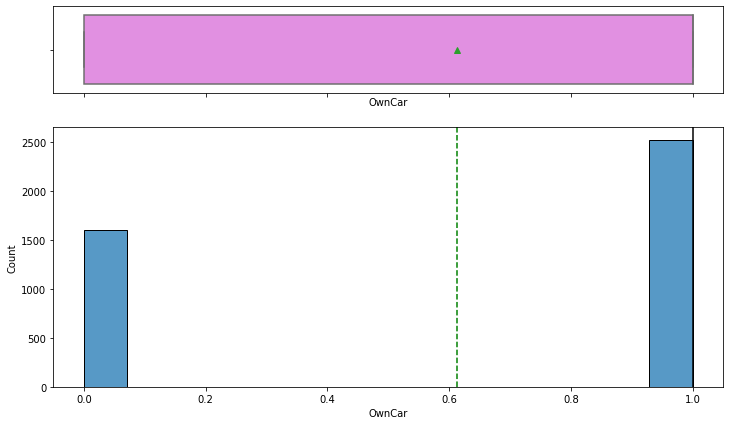

In [28]:
histogram_boxplot(data,'OwnCar')

* This binary distribution is left-skewed. Most customers do own a vehicle.

### Observations on NumberOfChildrenVisiting

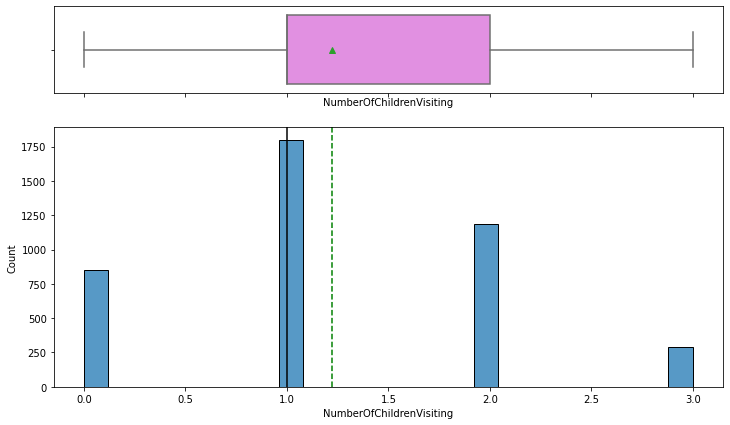

In [29]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

* This distribution is right-skewed, median number of children visiting is 1.

### Observations on MonthlyIncome

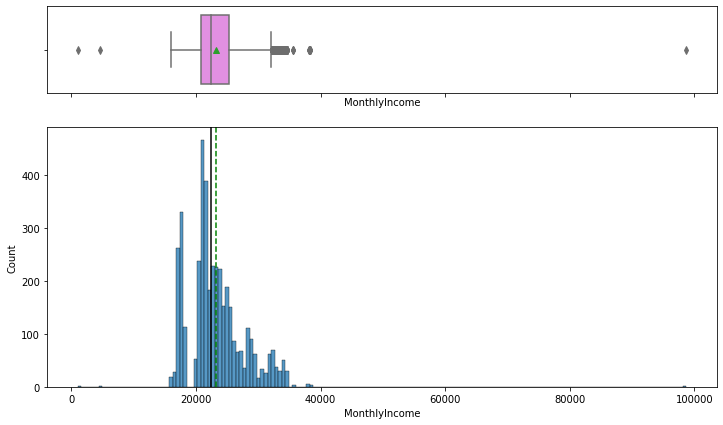

In [30]:
histogram_boxplot(data,'MonthlyIncome')

* This distribution is right-skewed, also appears to be bimodal to the left of the median.
* Has outliers to left and right.

I have decided to include all of the listed outliers in the set, do not see a need to treat for these as there are only a few across the entire set and they do not seem to significantly impact the skewness from what it would be without the outliers.

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on TypeofContact

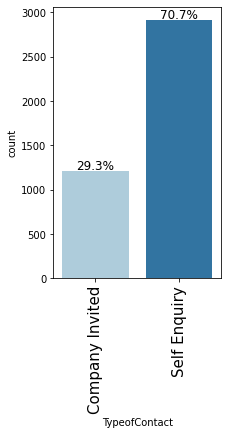

In [32]:
labeled_barplot(data,"TypeofContact",perc=True)

* 70.7% of the types of contact are self enquiries. 
* 29.3% are company invited.
* This column only has two categories of interest.

In [33]:
#Convert to categorical and check dtypes
data["TypeofContact"] = data["TypeofContact"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   object  
 6   Gender                    4128 non-null   object  
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   object  
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   object  
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

### Observations on DurationOfPitch

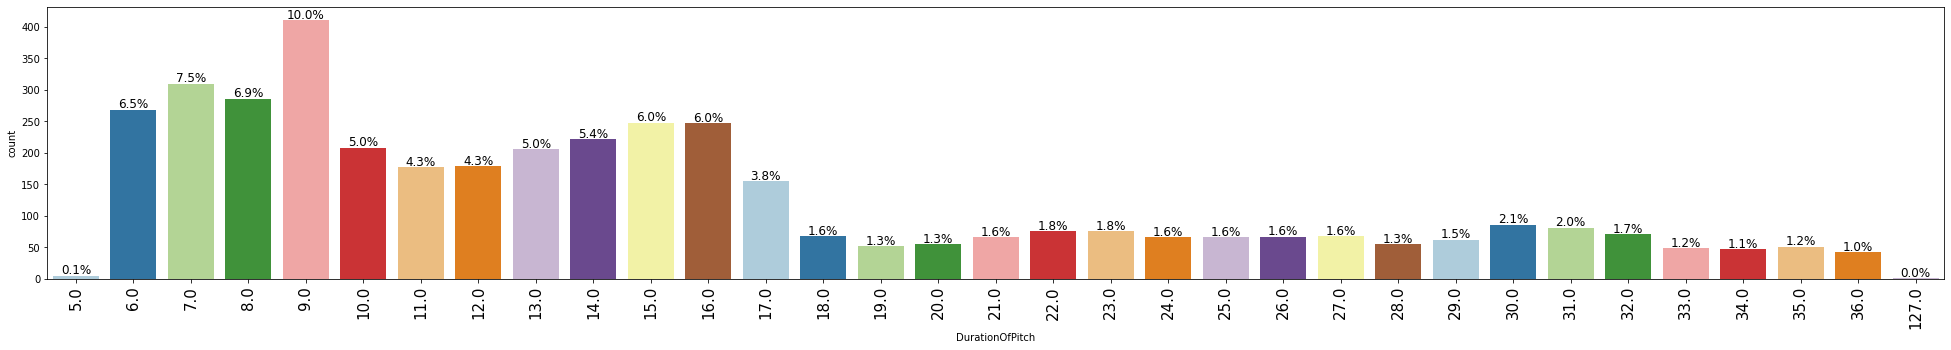

In [34]:
labeled_barplot(data,"DurationOfPitch",perc=True)

In [35]:
#Convert this column to numerical values from string integers
data["DurationOfPitch"] = pd.to_numeric(data["DurationOfPitch"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   object  
 6   Gender                    4128 non-null   object  
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   object  
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   object  
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

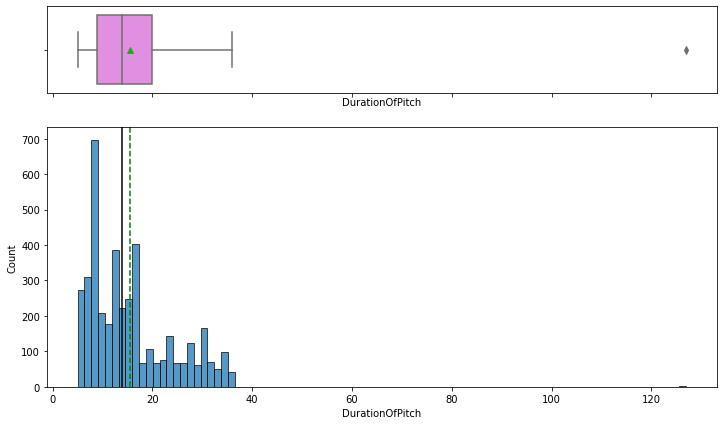

In [36]:
histogram_boxplot(data,'DurationOfPitch')

* This distribution is right-skewed.

### Observations on Occupation

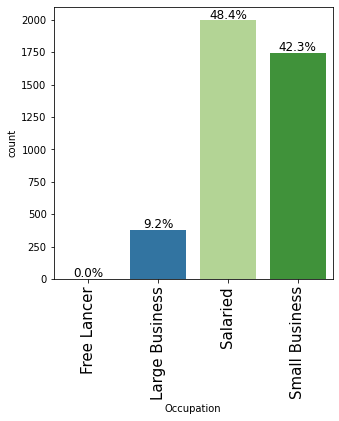

In [37]:
labeled_barplot(data,"Occupation",perc=True)

* This column is already binned to 4 classes, the dominant classes are Small Business and Salaried occupations.

In [38]:
#Convert to categorical and check dtypes
data["Occupation"] = data["Occupation"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   object  
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   object  
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   object  
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

### Observations on Gender

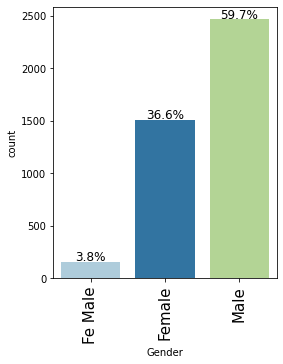

In [39]:
labeled_barplot(data,"Gender",perc=True)

* Majority of customers are male.
* Appears that "Fe Male" is intended to be the same as "Female."

In [40]:
#Merging Fe Male and Female
data.Gender = data.Gender.replace(to_replace="Fe Male", value="Female")

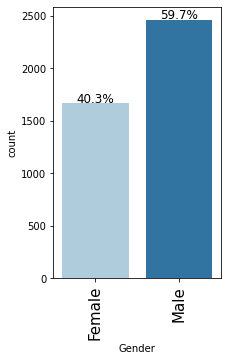

In [41]:
labeled_barplot(data,"Gender",perc=True)

* The female classes are now merged
* Females are 40.3% of the distribution, as expected.

In [42]:
#Convert to categorical and check dtypes
data["Gender"] = data["Gender"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   object  
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   object  
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

### Observations on ProductPitched

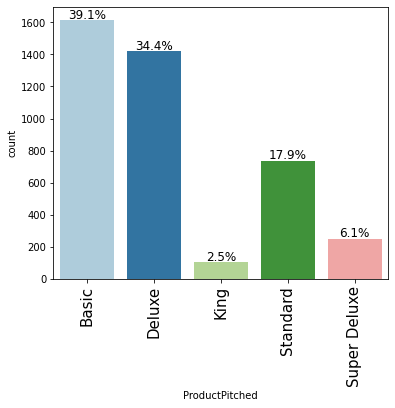

In [43]:
labeled_barplot(data,"ProductPitched",perc=True)

* Majority of the products pitched are the Basic and Deluxe products.
* Standard represents the third largest class with 17.9% of the dataset.

In [44]:
#Convert to categorical and check dtypes
data["ProductPitched"] = data["ProductPitched"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   category
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   object  
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

### Observations on MaritalStatus

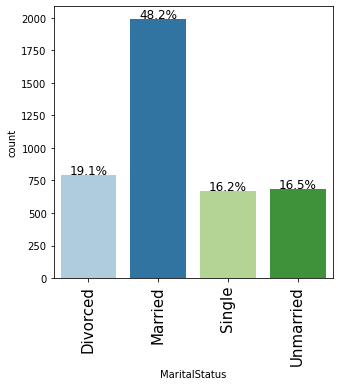

In [45]:
labeled_barplot(data,"MaritalStatus",perc=True)

* Most customers are married at 48.2% of the dataset.
* The remaining customers are somewhat evenly distributed between Divorced, Single, and Unmarried.

In [46]:
#Convert to categorical and check dtypes
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   category
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   category
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

### Observations on Designation

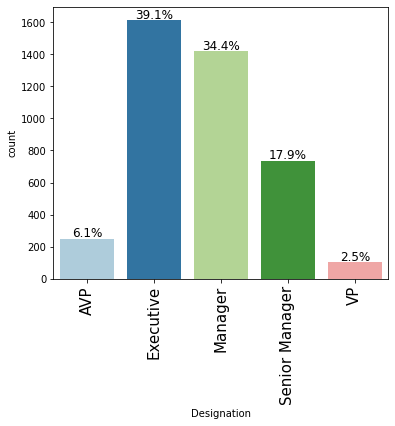

In [47]:
labeled_barplot(data,"Designation",perc=True)

* Most customers are designated with Executive and Manager with 39.1% and 34.4% of the dataset, respectively.

In [48]:
#Convert to categorical and check dtypes
data["Designation"] = data["Designation"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   int64   
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   category
 10  PreferredPropertyStar     4128 non-null   float64 
 11  MaritalStatus             4128 non-null   category
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   int64 

All potential categorical data columns have been checked and converted to the proper dtype.

## Bivariate Analysis

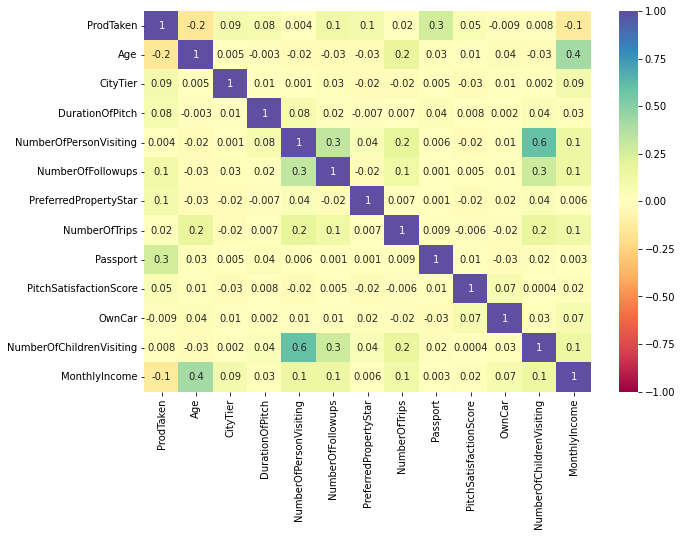

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

* Number of children visiting has a moderate correlation with the number of people visiting.
* Age has a moderate correlation with MonthlyIncome, which is usually the case.
* All other pairs have little to no correlation.

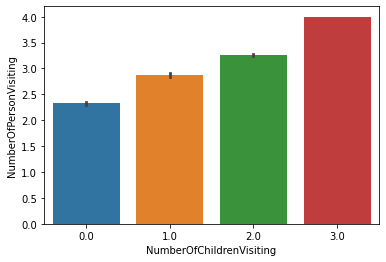

In [50]:
sns.barplot(x="NumberOfChildrenVisiting", y="NumberOfPersonVisiting", data=data,)

* We can see this correlation showcased here.

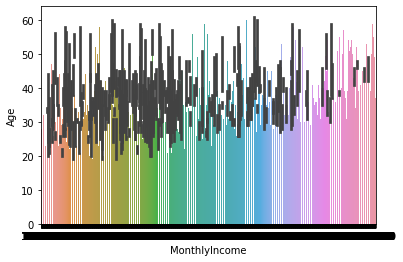

In [51]:
sns.barplot(x="MonthlyIncome", y="Age", data=data,)

We also see the slight positive correlation of these two columns here.

## Profiles

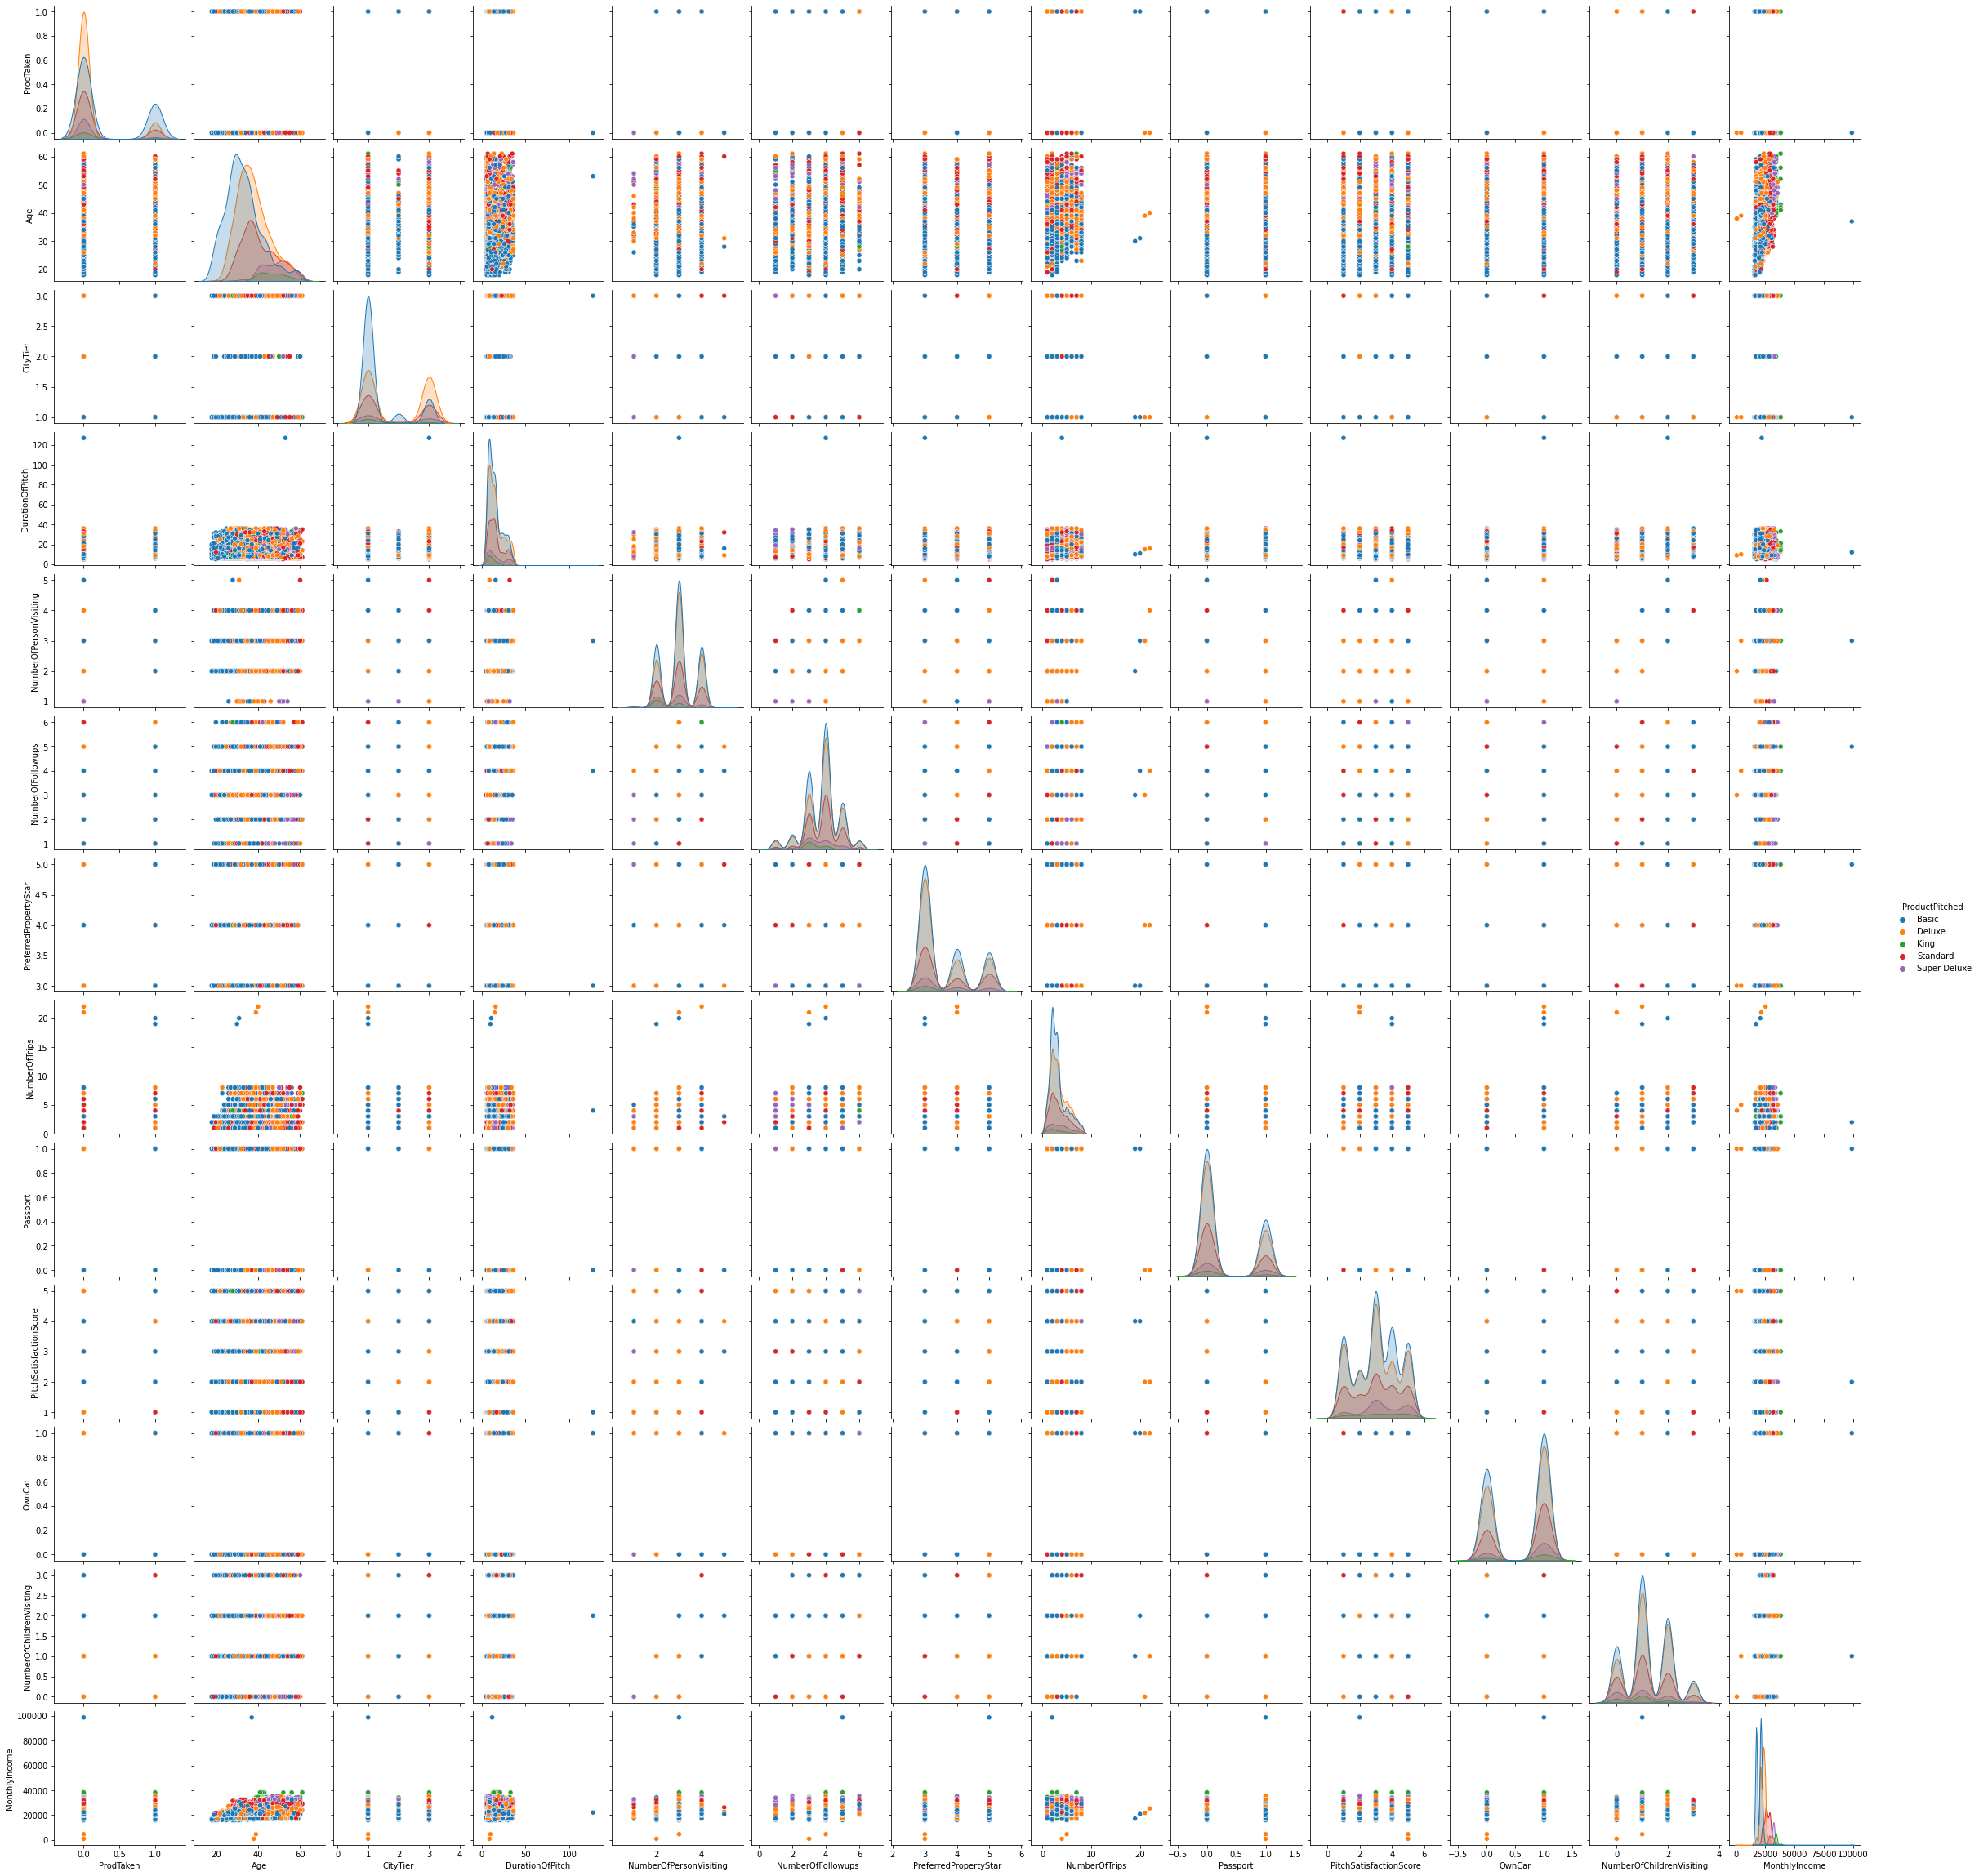

In [52]:
sns.pairplot(data,hue='ProductPitched')
plt.show()

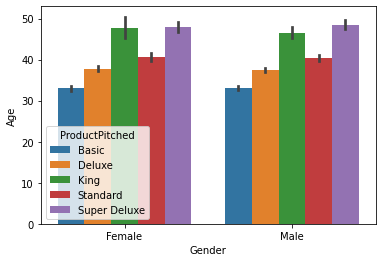

In [53]:
sns.barplot(x="Gender", y="Age",
            hue=data.ProductPitched,
            data=data,
           )

* We can see that across both genders there are very little differences in the median ages of those purchasing each Product line.
* We also see that the women have noticeably larger IQRs for the standard and King models.

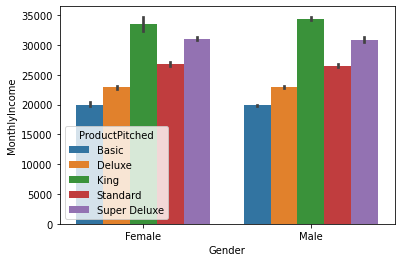

In [54]:
sns.barplot(x="Gender", y="MonthlyIncome",
            hue=data.ProductPitched,
            data=data,
           )

* We also see a noticeably larger IQR of monthly income for females pitched the King model, but the medians are similar across the models as was with age and gender.

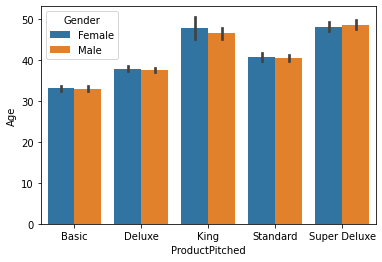

In [55]:
sns.barplot(x="ProductPitched", y="Age",
            hue=data.Gender,
            data=data,
           )

* The IQR differences can also be seen more clearly in this way across the two genders.

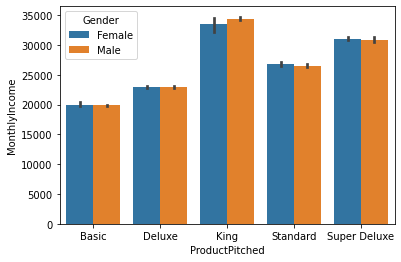

In [56]:
sns.barplot(x="ProductPitched", y="MonthlyIncome",
            hue=data.Gender,
            data=data,
           )

* Same can be seen here, I believe that the major difference that we can detect across models between both age and gender and monthly income and gender is the spread of the King model.

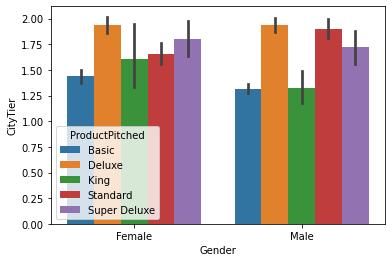

In [57]:
sns.barplot(x="Gender", y="CityTier",
            hue=data.ProductPitched,
            data=data,
           )

* There are noticeable differences between the average city tier value of females being pitched the King and Standard models.

# **Insights based on EDA**

### *Customer details:*

- **CustomerID:** Seems to be a symmetric distribution of sequentially assigned IDs

- **ProdTaken:** Right-skewed, binary, and most customers did not purchase a package.

- **Age:** Right-skewed, but fairly symmetric.

- **TypeofContact:** Majority of contacts are self enquiries.

- **CityTier:** Most cities are tier 1 in this dataset, next largest group is tier 3 but it is a significantly smaller portion of the set.

- **Occupation:** Vast majority of the set are salaried or small business type.

- **Gender:** 59.7% of the set are male.

- **NumberOfPersonVisiting:** Slightly left-skewed.

- **PreferredPropertyStar:** All customers prefer 3 star or above, most prefer 3 star. Right-skewed.

- **MaritalStatus:** Most customers are married.

- **NumberOfTrips:** Slightly right-skewed.

- **Passport:** Right-skewed, most do not possess a passport.

- **OwnCar:** Left-skewed, most do possess a vehicle.

- **NumberOfChildrenVisiting:** Slightly right-skewed, most customers bring 1 child.

- **Designation:** Majority are either designated as executive or manager, with slightly more executives.

- **MonthlyIncome:** Slightly right-skewed, seems to be bimodal to the left of the median.

### *Customer interaction data:*

- **PitchSatisfactionScore:** Seems fairly symmetric and slightly right-skewed, despite the slightly negative skew value we saw in the beginning.

- **ProductPitched:** The basic and deluxe products are primarily pitched, next largest class is standard.

- **NumberOfFollowups:** Left-skewed, most customers get 4 or 3 call backs.

- **DurationOfPitch:** Right-skewed distribution.

In [58]:
backup = data.copy()

# Drop and Split Data

In [59]:
#Drop customer interaction data from x-axis as it is not relevant to our model goals
X= data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= data['ProdTaken']
X = pd.get_dummies(X, drop_first=True)

In [60]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2889, 21) (1239, 21)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [61]:
y.value_counts(1)

0    0.806928
1    0.193072
Name: ProdTaken, dtype: float64

In [62]:
y_test.value_counts(1)

0    0.807103
1    0.192897
Name: ProdTaken, dtype: float64

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.870864  0.67364   0.662551  0.66805


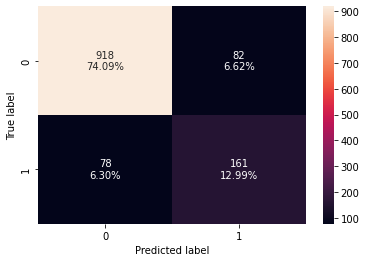

In [65]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree seems to be overfitting.
* Let's try tuning and comparing.

### Hyperparameter Tuning

In [66]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.870864  0.67364   0.662551  0.66805


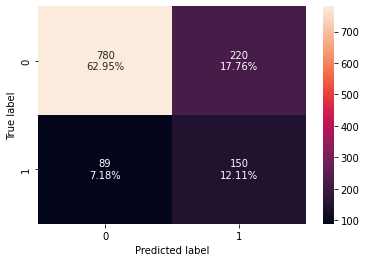

In [67]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* No real change occurred from this tuning.

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.886199  0.497908       0.85  0.627968


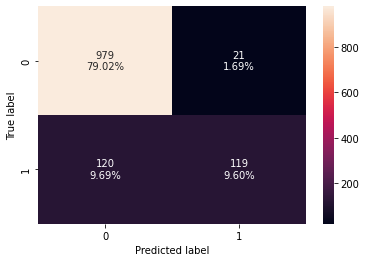

In [68]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest has a lower F1 than the decision tree, but it also appears to be overfitting.
* Let's try tuning and comparing.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=10,
                       max_features=None, min_samples_split=7, n_estimators=60,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.972655  0.946237   0.915078  0.930396
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.880549  0.610879   0.726368  0.663636


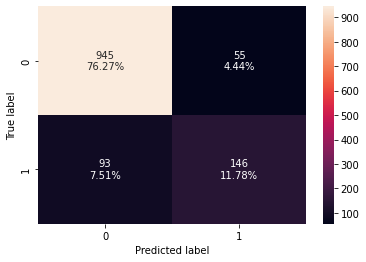

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced.
* The f1 score and recall have increased.

## Bagging Classifier

   Accuracy    Recall  Precision        F1
0     0.991  0.958781   0.994424  0.976277
   Accuracy    Recall  Precision        F1
0  0.876513  0.506276   0.775641  0.612658


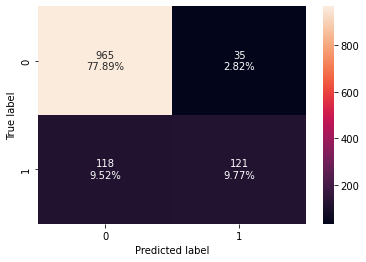

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try tuning as well.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.897498  0.564854    0.85443  0.680101


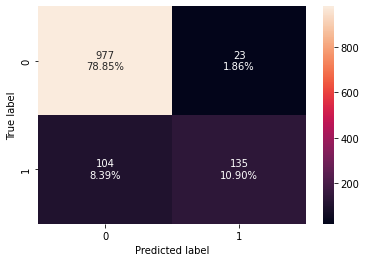

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* We still seem to be overfitting and it has actually gotten worse from the tuning, but we also see that the accuracy, recall, precision, and f1 have all increased on the training set.

## AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.853929  0.387097    0.72973  0.505855
   Accuracy    Recall  Precision        F1
0  0.820016  0.276151   0.568966  0.371831


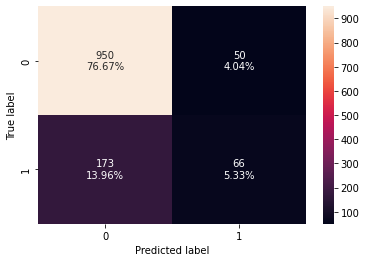

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* AdaBoost has a lower F1 than the decision tree, but it also appears to be overfitting although not as poorly.
* Let's try tuning and comparing.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=100, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.984424  0.937276   0.981238  0.958753
   Accuracy    Recall  Precision        F1
0  0.866021  0.573222   0.681592  0.622727


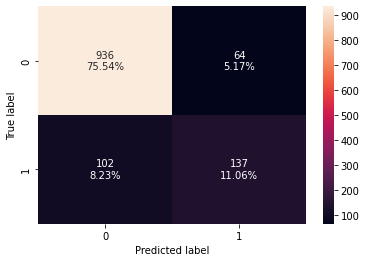

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* We still seem to be overfitting and it has actually gotten worse from the tuning, but we also see that the accuracy, recall, precision, and f1 have all increased on the training set.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.888889  0.503584   0.864615  0.636467
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.855529  0.393305   0.734375  0.512262


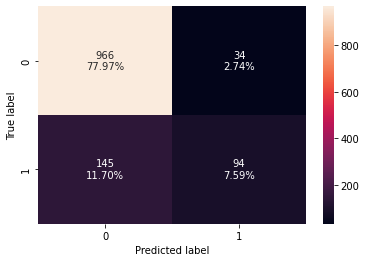

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* Gradient Boosting has a lower F1 than the decision tree and it appears to be overfitting, but not as poorly as the decision tree.
* Let's try tuning and comparing.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.926618  0.664875   0.936869  0.777778
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861985  0.443515   0.736111  0.553525


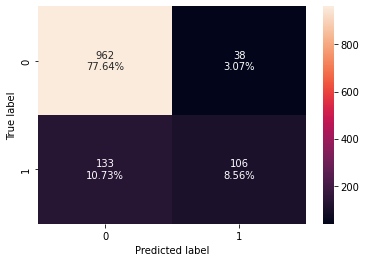

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* The overfitting appears to have gotten worse, but the accuracy, recall, precision, and f1 have increased as well.

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.887158  0.491039   0.867089  0.627002
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.850686  0.359833   0.728814  0.481793


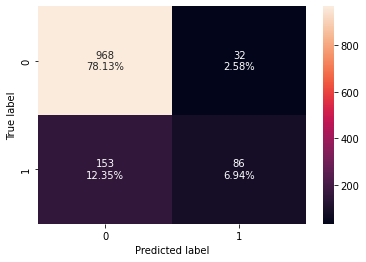

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data, but not as bad as the decision tree.
* Let's try hyperparameter tuning it.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7,
              eval_metric='logloss', learning_rate=0.2, n_estimators=50,
              random_state=1, scale_pos_weight=2, subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878851  0.663082   0.695489  0.678899
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.833737  0.523013   0.576037  0.548246


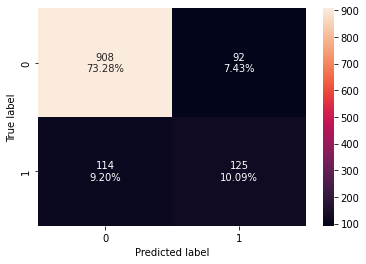

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has gotten slightly better and the f1 score has increased slightly.
* The precision and recall have also decreased and increased respectively, this model's performance has not actually improved much.

## Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=10,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       n_estimators=60,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                    

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* Stacking classifier has a lower F1 than the decision tree, but it also appears to be overfitting.
* Slight performance improvement in comparison to the tuned xgboost, but worse in overfitting compared to tuned xgboost.

# **Actionable Insights and Recommendations**

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,1.0,0.972655,0.991000,1.0,0.853929,0.984424,0.888889,0.926618,0.887158,0.878851,0.961578
Recall,1.0,1.0,1.0,0.946237,0.958781,1.0,0.387097,0.937276,0.503584,0.664875,0.491039,0.663082,0.955197
Precision,1.0,1.0,1.0,0.915078,0.994424,1.0,0.729730,0.981238,0.864615,0.936869,0.867089,0.695489,0.861066
F1,1.0,1.0,1.0,0.930396,0.976277,1.0,0.505855,0.958753,0.636467,0.777778,0.627002,0.678899,0.905692


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.870864,0.870864,0.886199,0.880549,0.876513,0.897498,0.820016,0.866021,0.855529,0.861985,0.850686,0.833737,0.867635
Recall,0.673640,0.673640,0.497908,0.610879,0.506276,0.564854,0.276151,0.573222,0.393305,0.443515,0.359833,0.523013,0.669456
Precision,0.662551,0.662551,0.850000,0.726368,0.775641,0.854430,0.568966,0.681592,0.734375,0.736111,0.728814,0.576037,0.653061
F1,0.668050,0.668050,0.627968,0.663636,0.612658,0.680101,0.371831,0.622727,0.512262,0.553525,0.481793,0.548246,0.661157


* Most models are overfitting.
* The bagging classifier tuned has the best f1 score, but we did notice that it was still overfitting.
* Random forest tuned, stacking, the decision tree have the next best f1 scores.
* Random forest tuned and stacking both have similar overfitting and seem like better general models than bagging which has the highest f1 score. The decision tree is overfitting worse than either of these.

*For these reasons I will be using the tuned random forest model to get further insight for the business, seems to be the best model for this purpose when considering the pros and cons.*

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion:

- Based on our analysis, we can say that the most notable features of this set when predicting if a customer makes a purchase are:  
Age, Monthly Income, and Passport
- I would advise the company to specifically target higher earning individuals and older individuals through targeted marketing campaigns. There is also a potential marketing opportunity at airports, in post offices, and anywhere else where passports may be used, presented, or issued.
- May be beneficial to offer some type of incentive, like a senior discount, to encourage more buyers and more traffic.
- The accuracy of this model so far is relatively good, but I would suggest that this continue to be improved through additional relevant data, further training, and further comparison of the modeling score.
- We also saw from the EDA that the most popular products were the standard and king, so emphasizing those may be beneficial to sales performance. We also saw that males were the majority of the customers and that most customers came from Tier 1 cities, therefore there may be marketing potential to both the male demographic and more affluent cities.
- Car owners were also more common than those that do not own cars, so there is a potential to market to drivers through billboards and signs.
- Our model also predicted high importance of executive types and there may be a marketing opportunity to cater to them.